# Πρόβλεψη τιμών ακινήτων


<font size="4"> Load τις βιβλιοθήκες

In [22]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Dense, Activation
from keras.models import Sequential
import numpy as np

print('Setup complete')

Setup complete


<font size="4"> Αρχικά φορτώνουμε τα δεδομένα από το csv αρχείο σε ένα pandas dataframe και με τη συνάρτηση head() βλέπουμε τις πρώτες 5 γραμμές

In [23]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<font size='4'> Η συνάρτηση describe μας δίνει μερικές στατιστικές πληροφορίες για τα δεδομένα

In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Ενώ η συνάρτηση info() μας λέει το είδος δεδομένων κάθε στήλης

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<font size='4'>Ξεχωρίζουμε τα χαρακτηρηστικά στις μεταβλητές X και y. Στην μεταβλητή y θα μπει το χαρακτηρηστικό στόχος 'median_house_value' 

In [26]:
X = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
        'population','households','median_income','ocean_proximity']]
y = df[['median_house_value']]

<font size='4'>Ξεχωρίζουμε τα αριθμητικά χαρακτηρηστικά από τα κατηγορικά

In [27]:
categorical = [col for col in X.columns if X[col].dtype=='object']
numerical = [col for col in X.columns if X[col].dtype!='object']

## Οπτικοποίηση δεδομένων

### Ιστογράμματα

<font size='4'>Χρησιμοποιούμε τη συνάρτηση hist() που δημιουργεί ιστόγραμμα για κάθε στήλη του dataframe

c:\users\hatzn\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


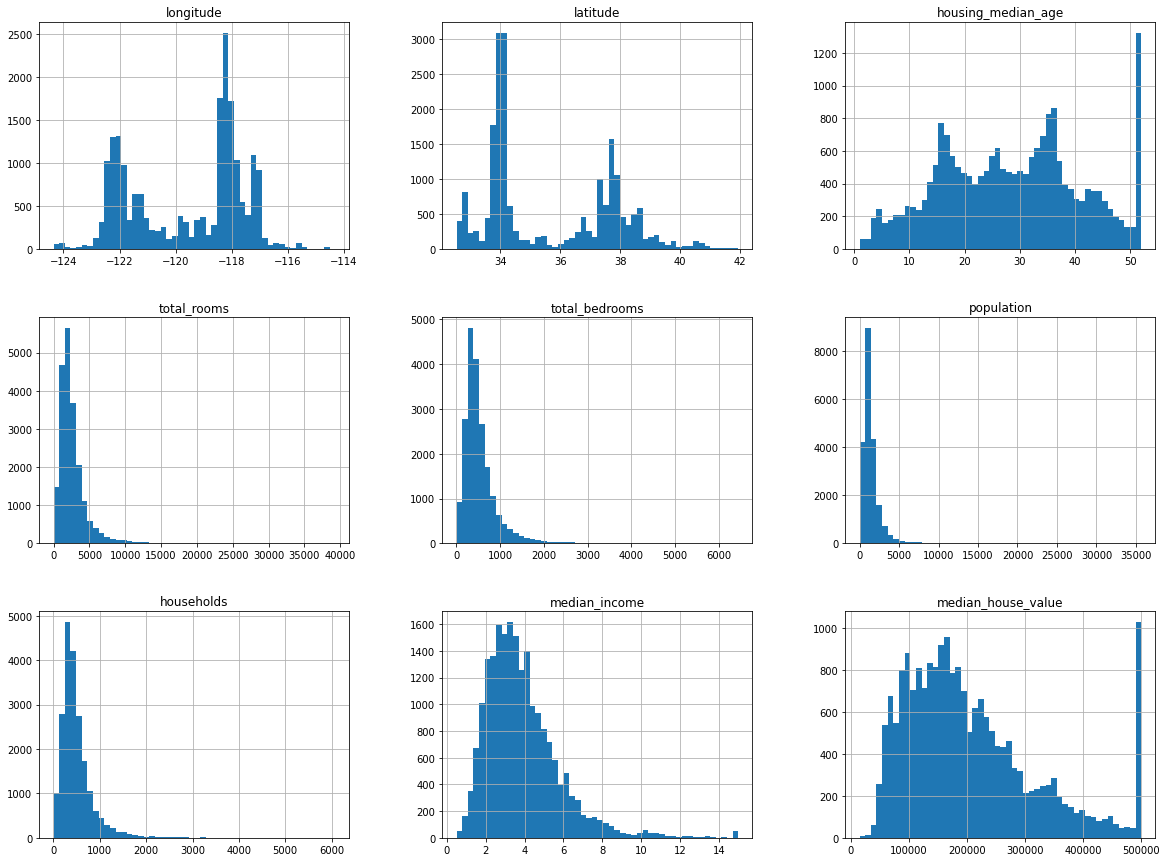

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Δισδιάστατα γραφήματα 

<font size='4'>Χρησιμοποιούμε τη συνάρτηση plot με παράμετρο kind="scatter". Δοκιμάζουμε κάθε χαρακτηρηστικό του Χ με το χαρακτηρηστικό "median_house_value"

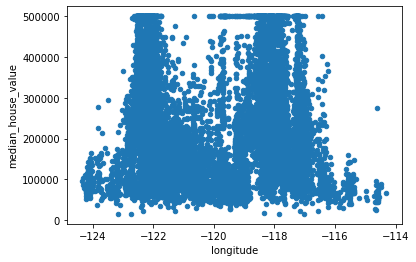

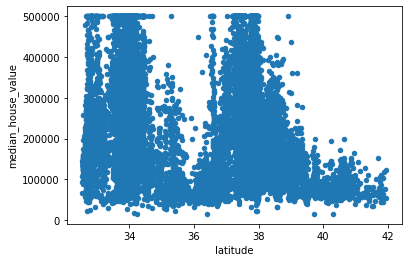

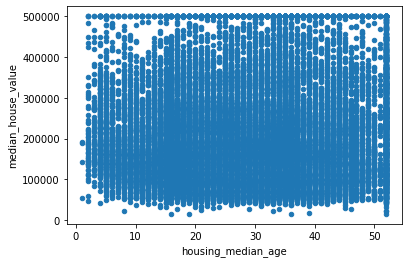

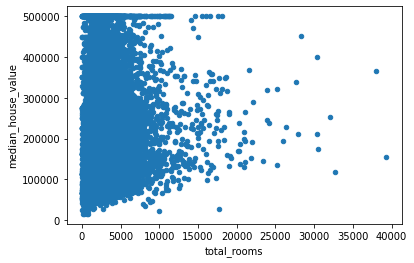

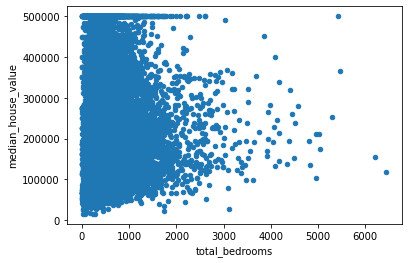

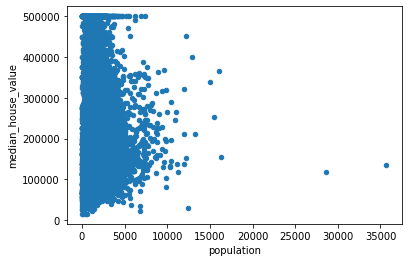

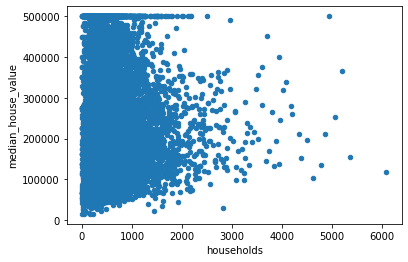

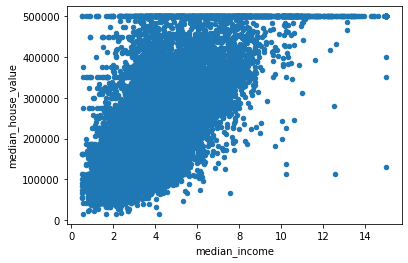

In [29]:
df.plot(kind="scatter",x="longitude",y="median_house_value")
df.plot(kind="scatter",x="latitude",y="median_house_value")
df.plot(kind="scatter",x="housing_median_age",y="median_house_value")
df.plot(kind="scatter",x="total_rooms",y="median_house_value")
df.plot(kind="scatter",x="total_bedrooms",y="median_house_value")
df.plot(kind="scatter",x="population",y="median_house_value")
df.plot(kind="scatter",x="households",y="median_house_value")
df.plot(kind="scatter",x="median_income",y="median_house_value")
plt.show()

## Προεπεξεργασία δεδομένων
<br>

<font size='4'>
    <strong>1) Ελλιπείς τιμές</strong>

Χρησιμοποιούμε τη συνάρτηση isnull() για να μετρήσουμε τις τιμές που λείπουν σε κάθε στήλη

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<AxesSubplot:>

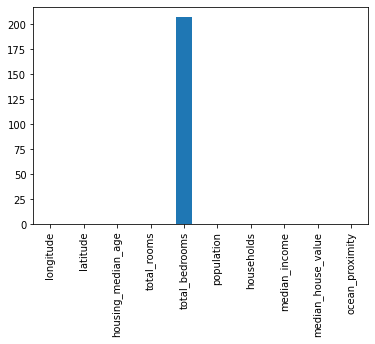

In [30]:
missing = df.isnull().sum()
print(missing)
missing.plot.bar()

<font size='4'>Χρησιμοποιούμε τον SimpleImputer με strategy="median" για να γεμίσουμε τις ελλιπείς τιμές με τη διάμεση τιμή και μετά αντικαθιστούμε τις παλιές στήλες του Χ (που έχουν nan τιμές) με τις νέες (που δεν έχουν)

In [31]:
imputer = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(imputer.fit_transform(X[numerical]),columns=numerical)

X_temp = X.drop(numerical,axis=1)
X = pd.concat([X_temp,X_imp],axis=1)

print(X.isnull().sum())

ocean_proximity       0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


<font size='4'>και τώρα γέμισαν οι θέσεις με τις κενές τιμές</font>

### 2) Κλιμάκωση

<font size='4'>Χρησιμοποιούμε την τεχνική MinMax για να βρίσκονται όλα τα δεδομένα μας στην κλίμακα 0-1
    https://en.wikipedia.org/wiki/Feature_scaling

In [32]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numerical]),columns=numerical)

X_temp = X.drop(numerical,axis=1)
X = pd.concat([X_temp,X_scaled],axis=1)

X.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,NEAR BAY,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,NEAR BAY,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,NEAR BAY,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,NEAR BAY,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,NEAR BAY,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776


<font size='4'>Επαναλαμβάνουμε για το y

In [33]:
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
y.head()

,median_house_value
0,0.902266
1,0.708247
2,0.695051
3,0.672783
4,0.674638


<font size='4'> Αν κάνουμε describe() τώρα θα δούμε πως οι μέγιστες και οι ελάχιστες τιμές είναι παντού 0 και 1 αντίστοιχα.

In [34]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
y.describe()

,median_house_value
count,20640.000000
mean,0.395579
std,0.237928
min,0.000000
25%,0.215671
50%,0.339588
75%,0.514897
max,1.000000


### 3) One-Hot-Encoding

Χρησιμοποιούμε την τεχνική One-Hot-Encoding για να αντιμετωπίσουμε το κατηγορικό χαρακτηρηστικό 'ocean_proximity'

In [36]:
oc_prox = X['ocean_proximity'].unique()
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)    #sparse=False?
X_enc = pd.DataFrame(encoder.fit_transform(X[categorical]),columns=oc_prox)
#X_enc.index = X.index

X_temp = X.drop(categorical,axis=1)
X = pd.concat([X_temp,X_enc],axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0


## Παλινδρόμηση δεδομένων

### 1) Αλγόριθμος Ελάχιστου Μέσου Τετραγωνικού Σφάλματος (Least Mean Squares)

<font size='4'> Υλοποιήσαμε τις συναρτήσεις lms_train και lms_predict για training του θ και πρόβλεψη αντίστοιχα

In [37]:
def lms_train(X,y,r=0.1):
    theta_curr = np.zeros((X.shape[1],1))
    theta_prev = np.ones((X.shape[1],1))
    counter=0
    n = len(y)

    while (counter<100):#απότομη κατ΄άβαση
        theta_prev = theta_curr
        y_pred = np.dot(X,theta_prev)
        theta_curr = theta_prev - (r/n)*X.T.dot(y_pred-y)
        counter += 1
    return theta_curr


def lms_predict(X,theta):
    return np.matmul(X,theta)

<font size='4'>Χρησιμοποιούμε τη συνάρτηση KFold για την 10-πλη διεπικύρωση και τις συναρτήσεις mean_squared_error και mean_absolute_error για το μέσο τετραγωνικό σφάλμα και το μέσο απόλυτο σφάλμα αντίστοιχα (σελ 116 βιβλίου)

In [38]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
k=1


for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    theta = lms_train(X_train.to_numpy(),y_train.to_numpy())
    pred = lms_predict(X_test.to_numpy(),theta)

    print(f'MSE for Fold Number: {k}, {mean_squared_error(y_test.to_numpy(), pred)}')
    print(f'MAE for Fold Number: {k}, {mean_absolute_error(y_test.to_numpy(), pred)}')
    print("\n")
    k=k+1

MSE for Fold Number: 1, 0.03258268899661575
MAE for Fold Number: 1, 0.1432787196114412


MSE for Fold Number: 2, 0.027732805470881472
MAE for Fold Number: 2, 0.13516083180856703


MSE for Fold Number: 3, 0.05460877685296844
MAE for Fold Number: 3, 0.19513020269019193


MSE for Fold Number: 4, 0.0431125393031951
MAE for Fold Number: 4, 0.17828683040766133


MSE for Fold Number: 5, 0.051678171674887224
MAE for Fold Number: 5, 0.17398002277145072


MSE for Fold Number: 6, 0.034315497636329344
MAE for Fold Number: 6, 0.13161322465891717


MSE for Fold Number: 7, 0.022146583571852653
MAE for Fold Number: 7, 0.11297852210082895


MSE for Fold Number: 8, 0.04559747968636063
MAE for Fold Number: 8, 0.1640375572389048


MSE for Fold Number: 9, 0.06566756448303805
MAE for Fold Number: 9, 0.19774579829145478


MSE for Fold Number: 10, 0.020137611952535682
MAE for Fold Number: 10, 0.1106512302821238




### 2) Αλγόριθμος Ελάχιστου Τετραγωνικού Σφάλματος (Least Squares)

<font size='4'> Υλοποιήσαμε τις συναρτήσεις least_squares_train και least_squares_predict για την εύρεση του θ και την πρόβλεψη αντίστοιχα (σελ 118 βιβλίου)

In [39]:
def least_squares_train(X,y):
    mul1 = X.T.dot(X)
    inv1 = np.linalg.pinv(mul1)
    mul2 = X.T.dot(y)
    theta = np.matmul(inv1,mul2)
    return theta

def least_squares_predict(X,w):
    return np.matmul(X,w)

<font size='4'> Σε κάθε iteration του loop κάνουμε train στο training set και predict στο test set

In [40]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
k=1


for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    w = least_squares_train(X_train.to_numpy(),y_train.to_numpy())
    pred2 = least_squares_predict(X_test.to_numpy(),w)

    print(f'MSE for Fold Number: {k}, {mean_squared_error(y_test.to_numpy(), pred2)}')
    print(f'MAE for Fold Number: {k}, {mean_absolute_error(y_test.to_numpy(), pred2)}')
    print("\n")

    k=k+1

MSE for Fold Number: 1, 0.031061262879315547
MAE for Fold Number: 1, 0.14393263106348145


MSE for Fold Number: 2, 0.015157333768622128
MAE for Fold Number: 2, 0.09767618585695427


MSE for Fold Number: 3, 0.03296963065450332
MAE for Fold Number: 3, 0.13035979123260175


MSE for Fold Number: 4, 0.01675178888293346
MAE for Fold Number: 4, 0.09733899963778296


MSE for Fold Number: 5, 0.029128564095689608
MAE for Fold Number: 5, 0.12598336189396817


MSE for Fold Number: 6, 0.020627414331549382
MAE for Fold Number: 6, 0.09894739702573442


MSE for Fold Number: 7, 0.011705792942303353
MAE for Fold Number: 7, 0.07771794067665784


MSE for Fold Number: 8, 0.03562970440179921
MAE for Fold Number: 8, 0.1411052229561011


MSE for Fold Number: 9, 0.025982099584260593
MAE for Fold Number: 9, 0.11919011693903694


MSE for Fold Number: 10, 0.01218785215560089
MAE for Fold Number: 10, 0.08017802956995398




### 3) Νευρωνικό δίκτυο

<font size='4'> Υλοποιήσαμε ένα νευρωνικό δίκτυο με τη βιβλιοθήκη keras. Το ΝΔ έχει ένα Input layer, 2 hidden layers μεγέθους 13 και ένα output layer. Χρησιμοποιούμε μόνο 5 epochs για λόγους ταχύτητας (τα σφάλματα είναι μικρά) 

In [41]:
k=1

for train_index,test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Dense(13, activation = 'relu', input_dim = 13))
    model.add(Dense(units = 13, activation = 'relu'))#hidden
    model.add(Dense(units = 13, activation = 'relu'))#hidden
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam',loss = 'mean_squared_error')

    model.fit(X_train, y_train, batch_size = 10, epochs = 5)

    y_pred = model.predict(X_test)

    print(f'MSE for Fold Number: {k}, {mean_squared_error(y_pred,y_test)}')
    print(f'MAE for Fold Number: {k}, {mean_absolute_error(y_pred,y_test)}')
    print("\n")

    k=k+1

Epoch 1/5
1858/1858 [==============================] - 5s 2ms/step - loss: 0.0258
Epoch 2/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0201
Epoch 3/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0193
Epoch 4/5
1858/1858 [==============================] - 5s 2ms/step - loss: 0.0184
Epoch 5/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0177
MSE for Fold Number: 1, 0.033169090941062934
MAE for Fold Number: 1, 0.14582035075200311


Epoch 1/5
1858/1858 [==============================] - 5s 2ms/step - loss: 0.0259
Epoch 2/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0205
Epoch 3/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0191
Epoch 4/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0182
Epoch 5/5
1858/1858 [==============================] - 4s 2ms/step - loss: 0.0174
MSE for Fold Number: 2, 0.012921006928162676
MAE for Fold Number: 2, 0.09002497661873664
